In [185]:
import networkx as nx
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

N = 40
N_1 = 10
P_1 = 0.2
random.seed(42)
np.random.seed(42)

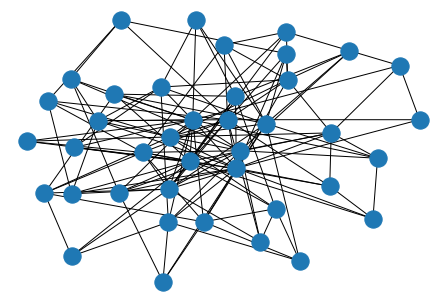

In [186]:
G = nx.powerlaw_cluster_graph(N, 4, 0.1)
pos = nx.spring_layout(G)
nx.draw(G, pos)

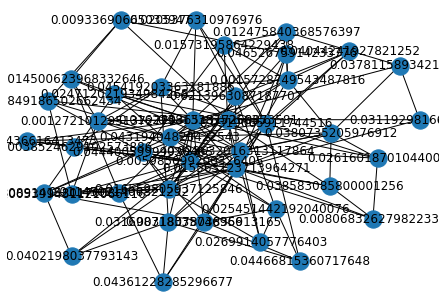

In [187]:
mp = np.random.random(len(G))
mp /= mp.sum()
nx.set_node_attributes(G, dict(zip(G, mp)), name='mining_power')

nx.draw(G, pos, labels=nx.get_node_attributes(G, 'mining_power'))

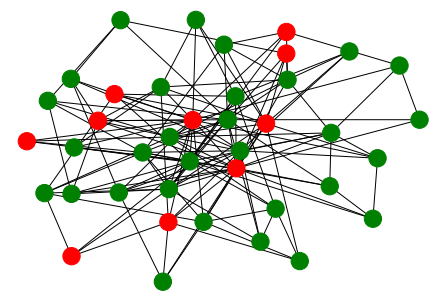

In [188]:
pool1 = random.sample(G.nodes, N_1)
rest = [node for node in G if node not in pool1]
colors = ['red' if node in pool1 else 'green' for node in G]
nx.draw(G, pos, node_color=colors)

In [189]:
power_1 = round(sum(nx.get_node_attributes(G.subgraph(pool1), 'mining_power').values()), 3)
power_r = round(sum(nx.get_node_attributes(G.subgraph(rest), 'mining_power').values()), 3)
print('pool1 power', power_1, 'rest power', power_r)

pool1 power 0.256 rest power 0.744


In [190]:
mp[pool1] *= P_1 / mp[pool1].sum()
mp[rest] *= (1 - P_1) / mp[rest].sum()
nx.set_node_attributes(G, dict(zip(G, mp.round(3))), name='mining_power')

power_1 = round(sum(nx.get_node_attributes(G.subgraph(pool1), 'mining_power').values()), 3)
power_r = round(sum(nx.get_node_attributes(G.subgraph(rest), 'mining_power').values()), 3)
print('pool1 power', power_1, 'rest power', power_r)

powers = [power_1, power_r]

pool1 power 0.2 rest power 0.8


# Mining

In [191]:
# max(mp) ** -1
mt = np.random.exponential(1 / mp)
argsort = np.argsort(mt)

for i in range(5):
    print(argsort[i], mt[argsort[i]], mp[argsort[i]] ** -1)

8 0.1460581205857769 20.936002574209525
12 3.1173371170995994 24.415159441182677
25 3.861272160666741 102.73582048301897
28 4.290648355125086 81.18372899772915
32 4.312100503174232 27.547925540219897


In [273]:
rewards = np.array([0, 0])
time = 0
forked = False
while time < 10000 or forked:
    mining_times = np.random.exponential(1 / mp)
    ordered_miners = np.argsort(mining_times)
    if ordered_miners[0] in pool1:
        rewards[0] += 1
    else:
        rewards[1] += 1
    time += min(mining_times)
relative_rewards = rewards / rewards.sum()

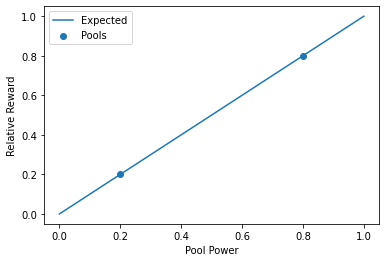

In [276]:
plt.plot([0, 1], [0, 1], label='Expected')
plt.scatter(powers, relative_rewards, label='Pools')
plt.legend()
plt.xlabel('Pool Power')
plt.ylabel('Relative Reward')
plt.show()